In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
col_list = ["NEWEdImpt","JobSat","ConvertedComp"]
data = pd.read_csv("C:/Users/noshi/Desktop/poralekha/Sem8/SoftwareMetrics/survey_results_public.csv",usecols=col_list)
#data = data.replace('NA', np.nan)
data.dropna(inplace=True)
#data.head
#list(data.columns.values)
print(data.shape)
print(data)

(34212, 3)
       ConvertedComp                              JobSat  \
7           116000.0               Slightly dissatisfied   
9            32315.0                      Very satisfied   
10           40070.0               Slightly dissatisfied   
11           14268.0                   Very dissatisfied   
12           38916.0                      Very satisfied   
...              ...                                 ...   
64142          984.0  Neither satisfied nor dissatisfied   
64148        19428.0                  Slightly satisfied   
64152          200.0                      Very satisfied   
64153        15048.0  Neither satisfied nor dissatisfied   
64154        38759.0  Neither satisfied nor dissatisfied   

                                NEWEdImpt  
7      Not at all important/not necessary  
9                        Fairly important  
10                         Very important  
11                     Somewhat important  
12     Not at all important/not necessary  
... 

In [2]:
data['NEWEdImpt'].value_counts()
#data['Hobbyist'] = data[np.isfinite(data['Hobbyist'])]
data['NEWEdImpt'] = data['NEWEdImpt'].map({'Not at all important/not necessary': 1, 'Somewhat important': 2,
                                          'Fairly important': 3, 'Very important': 4,
                                    'Critically important': 5})
data['JobSat'].value_counts()
data['JobSat'] = data['JobSat'].map({'Very dissatisfied': 1, 'Slightly dissatisfied': 2,
                                    'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied': 4,
                                    'Very satisfied': 5})
data['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
2000000.0    258
1000000.0    258
            ... 
102700.0       1
68721.0        1
96250.0        1
38456.0        1
21487.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

In [3]:
data['ConvertedComp']=(data['ConvertedComp']-data['ConvertedComp'].min())/(data['ConvertedComp'].max()-data['ConvertedComp'].min())
data['ConvertedComp'].value_counts()

0.060000    341
0.050000    306
0.075000    277
1.000000    258
0.500000    258
           ... 
0.031344      1
0.026340      1
0.004084      1
0.017875      1
0.007710      1
Name: ConvertedComp, Length: 6958, dtype: int64

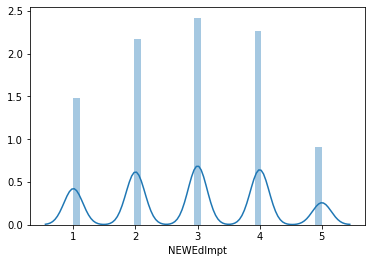

In [4]:
#histogram for normality check
#plt.hist(data['NEWEdImpt'])
#plt.show() 
sns.distplot(data['NEWEdImpt'])

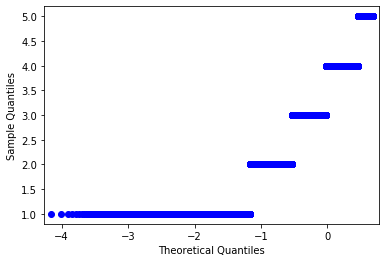

In [5]:
# q-q plot
qqplot(data['NEWEdImpt'], line='s')
plt.show()

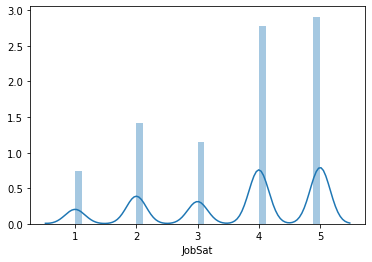

In [6]:
#plt.hist(data['JobSat'])
#plt.show() 
sns.distplot(data['JobSat'])

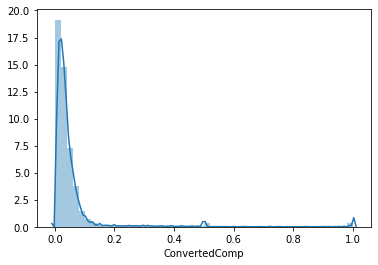

In [7]:
#plt.hist(data['ConvertedComp'])
#plt.show() 
sns.distplot(data['ConvertedComp'])

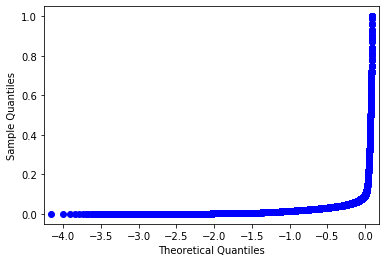

In [8]:
# q-q plot
qqplot(data['ConvertedComp'], line='s')
plt.show()

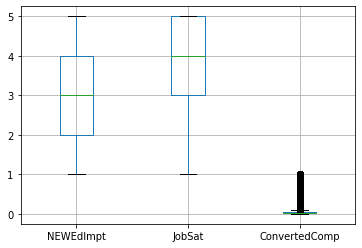

In [9]:
#checking equal variance with boxplot
boxplot = data.boxplot(column=['NEWEdImpt', 'JobSat', 'ConvertedComp'])

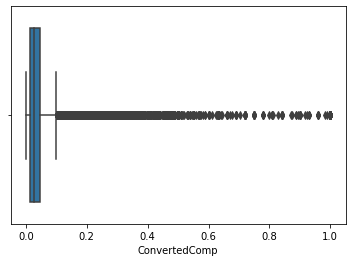

In [11]:
sns.boxplot(x=data['ConvertedComp'])

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ConvertedComp    0.035176
JobSat           2.000000
NEWEdImpt        2.000000
dtype: float64


In [13]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(62160, 3)

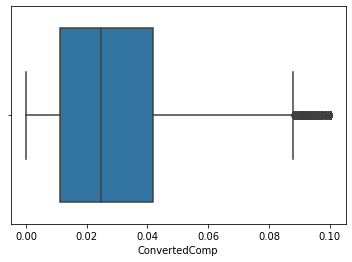

In [15]:
sns.boxplot(x=data_out['ConvertedComp'])

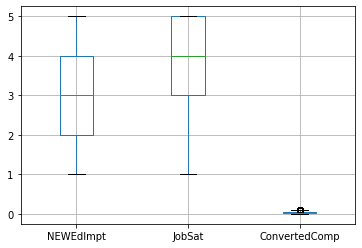

In [17]:
#checking equal variance with boxplot
boxplot = data_out.boxplot(column=['NEWEdImpt', 'JobSat', 'ConvertedComp'])

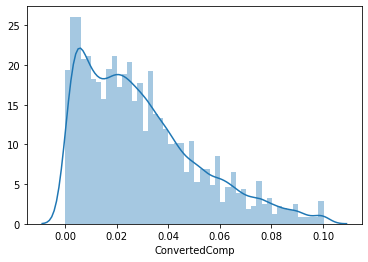

In [18]:
#plt.hist(data_out['ConvertedComp'])
#plt.show() 
sns.distplot(data_out['ConvertedComp'])

G:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


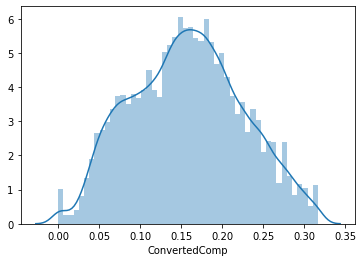

In [19]:
#sqrdata=data_out['ConvertedComp']**(.5)
data_out['ConvertedComp']=data_out['ConvertedComp']**(.5)
sns.distplot(data_out['ConvertedComp'])


In [20]:
#perform two-way ANOVA
model = ols('ConvertedComp ~ C(NEWEdImpt) + C(JobSat) + C(NEWEdImpt):C(JobSat)', data=data_out).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(NEWEdImpt),0.519819,4.0,29.498921,1.589865e-24
C(JobSat),4.729989,4.0,268.419342,2.542284e-227
C(NEWEdImpt):C(JobSat),0.085826,16.0,1.217625,2.445430e-01
Residual,140.633909,31923.0,NaN,NaN


In [21]:
#Since the p-values for NEWEdImpt and JobSat are both less than .05, 
#this means that both factors have a statistically significant effect on ConvertedComp.

#And since the p-value for the interaction effect is less than .05, 
#this tells us that there is significant interaction effect between NEWEdImpt and JobSat.